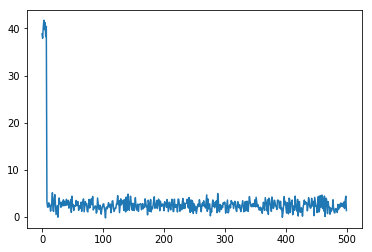

In [9]:
#!/usr/bin/env python3

import random
import string
import matplotlib.pyplot as plt
import math
import numpy as np

pool_size = 50

get_bin_int   = lambda x : format(x, "b").zfill(2)
get_bin_float = lambda x : format(x, "b").zfill(7)

def cross_over(x, y):

	N = len(x)
	if N == 0:
		N = 1
	posn = random.randint(0, N-1)

	x_new = x[0:posn+1] + y[posn+1:N]
	y_new = y[0:posn+1] + x[posn+1:N]

	return x_new, y_new

def mutate(x):

		N = len(x)
		x_new = ''

		#random position
		posn = random.randint(0, N-1)
		#random char
		c = ''
		if x[posn] == '1':
			c = '0'
		elif x[posn] == '0':
			c = '1'
		else:
			c = '-'

		x_new = x[0:posn] + c + x[posn+1:N]
		x = x_new

		return x_new

#takes input a single point
def get_num(x):

    xi = int(x[0], 2)
    xf = int(x[1], 2)

    sign = 1
    if xi == 0:
        sign = 1
    else:
        sign = (abs(xi)/xi)
    
    return sign*(abs(xi) + (xf/100))

#takes input 5d vector
def cal_f1(v):

    f1 = 0
    for i in range(0, 5):
        num = get_num(v[i])
        f1 = f1 + (num)*(num)

    return f1    

def cal_f2(v):

    f2 = 0
    for i in range(0, 5):
        num = get_num(v[i])
        f2 = f2 + math.floor(num)
    return f2

def cal_f3(v):

    f3 = 0
    for i in range(0, 5):
        num = get_num(v[i])
        f3 = f3 + (i+1)*(num**4)

    f3 = f3 + np.random.normal(0, 1) 
    return f3  

class entry:

    def __init__(self, value, points):
        self.value  = value
        self.points = points

def selection(pool):

    point_list = []

    for v in pool:
        point_list.append(entry(v, cal_f1(v) + cal_f2(v) + cal_f3(v)))

    sorted_list = sorted(point_list, key=lambda x: x.points, reverse=False)

    new_pool = []
    '''
    for x in sorted_list:
        print('vector=',x.value)
        print('f =',x.points)
    '''
    for i in range(0, pool_size):
        new_pool.append(sorted_list[i].value)

    return new_pool


if __name__ == "__main__":
    
    pool = []

    for i in range(0, pool_size):
        coll = []

        for _ in range(0, 5):

            x = random.randint(-2, 2)
            ibin = get_bin_int(x)

            y = random.randint(0, 99)
            fbin = get_bin_float(y)

            coll.append([ibin, fbin])

        pool.append(coll)
    
    #print('pool\n',pool)

    epoch = 500
    prob_mut   = 0.3
    prob_cross = 0.05

    x_axis = []
    y_axis = []

    for e in range(0, epoch):

        x_axis.append(e)

        m = np.random.binomial(1, prob_mut)
        c = np.random.binomial(1, prob_cross)

        #maintain 5 diverse points
        dindex  = random.sample(range(0, pool_size), 5)
        diverse = []
        for d in dindex:
            diverse.append(pool[d])

        #mutate
        if m == 1:
            i = random.randint(0, len(pool)-1)
            new_v = []
            v = pool[i]
            for i in range(0, 5):
                xi = mutate(v[i][0])

                #check after mutation if in range
                xint = int(xi, 2)
                if xint < -2 or xint > 2 :
                    new_v.append([v[i][0], v[i][1]])
                else:
                    new_v.append([xi, v[i][1]])

            pool.append(new_v)
        
        #cross over
        if c == 1:
            v  = random.randint(0, len(pool)-1)
            i1 = random.randint(0, 4)
            i2 = random.randint(0, 4)

            v_new = pool[v]

            y1, y2 = cross_over(pool[v][i1][1], pool[v][i2][1])
            y1i = int(y1, 2)
            y2i = int(y2, 2)
            if y1i < 0 or y1i > 99 or y2i < 0 or y2i > 99:
                pool.append(pool[v])
            else:
                v_new[i1] = [pool[v][i1][0], y1]
                v_new[i2] = [pool[v][i2][0], y2]
                pool.append(v_new)

        #print('pool size=',len(pool))

        #add the diverse points
        for i in range(0, 5):
            pool.append(diverse[i])

        pool = selection(pool)
        
        vopt = []
        for i in range(0, 5):
            vopt.append(get_num(pool[0][i]))

        #print('vector=',vopt)
        value = cal_f1(pool[0]) + cal_f2(pool[0]) + cal_f3(pool[0])
        #print('value=', value)
        y_axis.append(value)

    plt.plot(x_axis, y_axis)
    plt.show()